###Setting the Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Changing current working directory

In [2]:
%cd /content/drive/MyDrive/FARS

/content/drive/MyDrive/FARS


####Importing libraries and packages

In [ ]:
%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [30]:
import warnings
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import pyplot
from collections import Counter
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import joblib

warnings.filterwarnings('ignore')

####Importing the dataset

In [112]:
df=pd.read_csv('FARS1.csv')

###Data Exploration

In [ ]:
df.shape

(100968, 30)

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.duplicated().sum()

7964

In [113]:
df['Injury_Severity'].value_counts()

Fatal_Injury                      42116
No_Injury                         20007
Incapaciting_Injury               15072
Nonincapaciting_Evident_Injury    13890
Possible_Injury                    8674
Unknown                             901
Injured_Severity_Unknown            299
Died_Prior_to_Accident                9
Name: Injury_Severity, dtype: int64

In [ ]:
profile=ProfileReport(df, title='PandaReport')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###Data Wrangling

In [153]:
df =df.drop_duplicates(keep ='last')

Assume the unknown/minor values as one of the prominent values 

In [154]:
#SEX
df['SEX'].replace(['Unknown'], ['Female'], inplace=True)
#PERSON_TYPE
df['PERSON_TYPE'].replace(['Unknown_Occupant_Type_in_a_Motor_Vehicle_in_Transport'], ['Passenger_of_a_Motor_Vehicle_in_Transport'], inplace=True)
df['PERSON_TYPE'].replace(['Other_Pedestrian'], ['Pedestrian'], inplace=True)
df['PERSON_TYPE'].replace(['Other_Cyclist'], ['Bicyclist'], inplace=True)
df['PERSON_TYPE'].replace(['Unknown_Type_of_Non-Motorist'], ['Bicyclist'], inplace=True)

#SEATING_POSITION
df['SEATING_POSITION'].replace(['Second_Seat_-_Unknown'], ['Second_Seat_-_Middle'], inplace=True)
df['SEATING_POSITION'].replace(['Third_Seat_-_Unknown'], ['Third_Seat_-_Middle'], inplace=True)
df['SEATING_POSITION'].replace(['Front_Seat_-_Unknown'], ['Front_Seat_-_Middle'], inplace=True)
df['SEATING_POSITION'].replace(['Other_Passenger_in_passenger_or_cargo_area_(unknown_whether_or_not_enclosed)'], ['Other_Passenger_in_unenclosed_passenger_or_cargo_area'], inplace=True)

#RESTRAINT_SYSTEM-USE
df['RESTRAINT_SYSTEM-USE'].replace(['Unknown'], ['Shoulder_Belt'], inplace=True)
df['RESTRAINT_SYSTEM-USE'].replace(['Restraint_Used_-_Type_Unknown'], ['Lap_Belt'], inplace=True)
#AIR_BAG_AVAILABILITY/DEPLOYMENT

df['AIR_BAG_AVAILABILITY/DEPLOYMENT'].replace(['Deployed_Air_Bag_Direction_Unknown'], ['Deployed_Air_Bag_from_Side'], inplace=True)
df['AIR_BAG_AVAILABILITY/DEPLOYMENT'].replace(['Unknown_(If_Airbag_Available)'], ['Air_Bad_Available-Deployment_Not_Known_for_this_Seat'], inplace=True)


#EJECTION
df['EJECTION'].replace(['Unknown'], ['Partially_Ejected'], inplace=True)

#EXTRICATION
df['EXTRICATION'].replace(['Unknown'], ['Extricated'], inplace=True)

#POLICE_REPORTED_ALCOHOL_INVOLVEMENT
df['POLICE_REPORTED_ALCOHOL_INVOLVEMENT'].replace(['Unknown_(Police_Reported)'], ['Yes_(Alcohol_Involved)'], inplace=True)

#POLICE-REPORTED_DRUG_INVOLVEMENT
df['POLICE-REPORTED_DRUG_INVOLVEMENT'].replace(['Reported_Unknown'], ['Drugs_Involved'], inplace=True)

#TAKEN_TO_HOSPITAL
df['TAKEN_TO_HOSPITAL'].replace(['Unknown'], ['No'], inplace=True)

#Injury_Severity
df['Injury_Severity'].replace(['Unknown'], ['Possible_Injury'], inplace=True)
df['Injury_Severity'].replace(['Died_Prior_to_Accident'], ['Fatal_Injury'], inplace=True)
df['Injury_Severity'].replace(['Injured_Severity_Unknown'], ['Possible_Injury'], inplace=True)



Encoding the catogeries into numerical values with the help of label encoding

In [155]:
df_fs = df.drop(columns=['EJECTION_PATH', 'NON_MOTORIST_LOCATION', 'METHOD_ALCOHOL_DETERMINATION', 'ALCOHOL_TEST_TYPE','ALCOHOL_TEST_RESULT', 'METHOD_OF_DRUG_DETERMINATION', 'DRUG_TEST_TYPE','DRUG_TEST_RESULTS_(1_of_3)','DRUG_TEST_TYPE_(2_of_3)','DRUG_TEST_RESULTS_(2_of_3)','DRUG_TEST_TYPE_(3_of_3)','DRUG_TEST_RESULTS_(3_of_3)','HISPANIC_ORIGIN','RELATED_FACTOR_(1)-PERSON_LEVEL','RELATED_FACTOR_(2)-PERSON_LEVEL','RELATED_FACTOR_(3)-PERSON_LEVEL','RACE',])

In [156]:
le=LabelEncoder()
df_fs['CASE_STATE'] =le.fit_transform(df_fs['CASE_STATE'])
df_fs['PERSON_TYPE'] =le.fit_transform(df_fs['PERSON_TYPE'])
df_fs['SEATING_POSITION'] =le.fit_transform(df_fs['SEATING_POSITION'])
df_fs['RESTRAINT_SYSTEM-USE'] =le.fit_transform(df_fs['RESTRAINT_SYSTEM-USE'])
df_fs['AIR_BAG_AVAILABILITY/DEPLOYMENT'] =le.fit_transform(df_fs['AIR_BAG_AVAILABILITY/DEPLOYMENT'])
df_fs['EJECTION'] =le.fit_transform(df_fs['EJECTION'])
df_fs['EXTRICATION'] =le.fit_transform(df_fs['EXTRICATION'])
df_fs['POLICE_REPORTED_ALCOHOL_INVOLVEMENT'] =le.fit_transform(df_fs['POLICE_REPORTED_ALCOHOL_INVOLVEMENT'])
df_fs['POLICE-REPORTED_DRUG_INVOLVEMENT'] =le.fit_transform(df_fs['POLICE-REPORTED_DRUG_INVOLVEMENT'])
df_fs['Injury_Severity'] =le.fit_transform(df_fs['Injury_Severity'])

One hot encoding the features SEX and Taken_to_Hospital 


In [157]:
sexOHE = pd.get_dummies(df_fs['SEX'], prefix='SEX') 
df_fs = df_fs.join(sexOHE)
df_fs = df_fs.drop(columns=['SEX'])

TTHOHE = pd.get_dummies(df_fs['TAKEN_TO_HOSPITAL'], prefix='HOSPITAL') 
df_fs = df_fs.join(TTHOHE)
df_fs = df_fs.drop(columns=['TAKEN_TO_HOSPITAL'])

In [158]:
def evaluate(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train) 
 

  #results
  pred_test = model.predict(X_test)
  print('Accuracy(test) = ', model.score(X_test, y_test))
  print('Precision = ', precision_score(y_test, pred_test,average ='weighted',zero_division=0))
  print('Recall = ', recall_score(y_test, pred_test,average ='weighted',zero_division=0))
  print('f1 = ', f1_score(y_test, pred_test,average ='weighted',zero_division=0))

  #confusion matrix
  cm = confusion_matrix(y_test, pred_test)
  label = pd.unique(df['Injury_Severity'])
  print(cm)
  # The Confusion matrix as text isn't easy to read - so let's make into a figure
  display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
  display.plot()
  plt.xticks(rotation=60)
  plt.show()
 

###Starting the modeling

####Splitting the data

In [159]:
X = df_fs.drop(columns=['Injury_Severity'])
y = df_fs.filter(['Injury_Severity']).values.ravel()

####We split the data into training set and testing set with a 75%:25% split

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=10)

pipeline functions

In [20]:
def Pipeline1(X_train,y_train,X_test,y_test): 
  pipeline_lr=Pipeline([#('scalar1',MinMaxScaler()),
                      ('lr_classifier',LogisticRegression(random_state=10))])
  pipeline_dt=Pipeline([#('scalar2',MinMaxScaler()),
                      ('dt_classifier',DecisionTreeClassifier(random_state=10))])
  pipeline_rf=Pipeline([#('scalar3',MinMaxScaler()),
                      ('rf_classifier',RandomForestClassifier(random_state=10))])
  pipeline_SVC=Pipeline([#('scalar4',MinMaxScaler()),
                      ('svc_classifier',SVC(random_state=10))]) 
  pipeline_KNN=Pipeline([#('scalar5',MinMaxScaler()),
                      ('KNN_classifier',KNeighborsClassifier())])    

  pipelines = [pipeline_lr, pipeline_dt, pipeline_rf,pipeline_SVC,pipeline_KNN]          
  pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3: 'Support Vector Classifier' ,4: 'K-Nearest Neighbour'}
  for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
  for i,model in enumerate(pipelines):
      print("\n{}".format(pipe_dict[i])) 
      evaluate(model, X_train,y_train,X_test,y_test)

In [21]:
def Pipeline2(X_train,y_train,X_test,y_test,n_components): 
  pipeline_lr=Pipeline([('scalar1',MinMaxScaler()),
                      ('pca1',PCA(n_components=n_components)),
                      ('lr_classifier',LogisticRegression(random_state=10))])
  pipeline_dt=Pipeline([('scalar2',MinMaxScaler()),
                     ('pca2',PCA(n_components=n_components)),
                      ('dt_classifier',DecisionTreeClassifier(random_state=10))])
  pipeline_rf=Pipeline([('scalar3',MinMaxScaler()),
                     ('pca3',PCA(n_components=n_components)),
                      ('rf_classifier',RandomForestClassifier(random_state=10))])
  pipeline_SVC=Pipeline([('scalar4',MinMaxScaler()),
                    ('pca4',PCA(n_components=n_components)),  
                      ('svc_classifier',SVC(random_state=10))]) 
  pipeline_KNN=Pipeline([('scalar5',MinMaxScaler()),
                      ('pca4',PCA(n_components=n_components)),
                      ('KNN_classifier',KNeighborsClassifier())])  

  pipelines = [pipeline_lr, pipeline_dt, pipeline_rf,pipeline_SVC,pipeline_KNN]          
  pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3: 'Support Vector Classifier',4: 'K-Nearest Neighbour'}
  for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
  for i,model in enumerate(pipelines):
      print("\n{}".format(pipe_dict[i])) 
      evaluate(model, X_train,y_train,X_test,y_test)

####Run1 we use 5 machine learning algorithms namely logistic regression,decision tree,Random forest,support vector classifier and Knearest neighbour


Logistic Regression
Accuracy(test) =  0.5586426390262784
Precision =  0.5188471752264415
Recall =  0.5586426390262784
f1 =  0.5233833790708523
[[7923  682 1073  677    8]
 [1472  903   14 1163    5]
 [1108    2 2789   12    0]
 [ 996  730  135 1367    8]
 [ 661  321  501  694    7]]


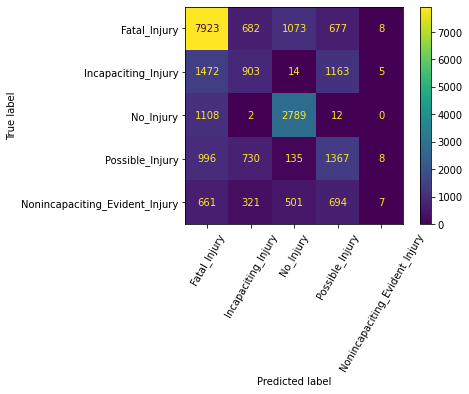


Decision Tree
Accuracy(test) =  0.5216549825813943
Precision =  0.5169752173766502
Recall =  0.5216549825813943
f1 =  0.5191955314398692
[[7279 1075  902  683  424]
 [1060 1226   18  886  367]
 [ 979   13 2363  117  439]
 [ 815  953  133  896  439]
 [ 499  402  438  480  365]]


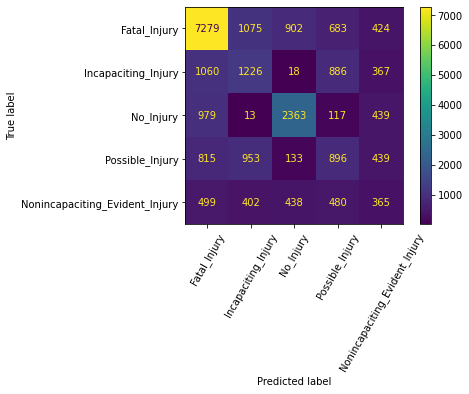


RandomForest
Accuracy(test) =  0.5575674164552062
Precision =  0.5431802853752188
Recall =  0.5575674164552062
f1 =  0.5497365769790006
[[7721  916  855  576  295]
 [1087 1217   14  938  301]
 [ 801   17 2703   69  321]
 [ 774  929  137  988  408]
 [ 442  371  493  543  335]]



Support Vector Classifier
Accuracy(test) =  0.565352027869769
Precision =  0.5275961462403889
Recall =  0.565352027869769
f1 =  0.5159249311210682
[[8722  429  912  297    3]
 [1937  892   12  695   21]
 [1288    0 2605    7   11]
 [1624  584  123  897    8]
 [ 957  236  512  450   29]]



K-Nearest Neighbour
Accuracy(test) =  0.5111608102877295
Precision =  0.4720331372066853
Recall =  0.5111608102877295
f1 =  0.4842928615744727
[[7840  812 1054  478  179]
 [1616  992  176  617  156]
 [1300  157 2160  119  175]
 [1265  775  305  697  194]
 [ 758  362  514  354  196]]


In [ ]:
Pipeline1(X_train,y_train,X_test,y_test)

To Handle the Imbalanced dataset we use the SMOTE() method of imblearn 

In [23]:
oversample = SMOTE(random_state =10)
X1_train, y1_train = oversample.fit_resample(X_train, y_train)

In [82]:
minmax=MinMaxScaler()
X1_train_scl =minmax.fit_transform(X1_train)
X1_test_scl =minmax.fit_transform(X_test)

In [34]:
# undersample = RandomUnderSampler( random_state=10)
# X2_train, y2_train = undersample.fit_resample(X_train, y_train)

####Run 2 using oversampled dataset


Logistic Regression
Accuracy(test) =  0.5048385015698249
Precision =  0.5523395289191027
Recall =  0.5048385015698249
f1 =  0.49365630524197884
[[4937 1736 1993 1512  185]
 [ 337 1264   22 1838   96]
 [ 485    3 3374   13   36]
 [ 212  669  172 2119   64]
 [ 193  282  655 1010   44]]


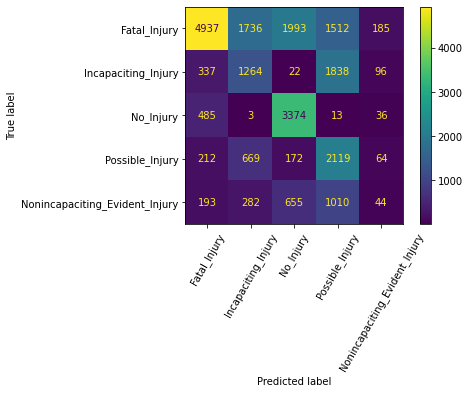


Decision Tree
Accuracy(test) =  0.516407896434562
Precision =  0.5255029987429886
Recall =  0.516407896434562
f1 =  0.5206001524566158
[[6917 1159  985  747  555]
 [ 911 1231   17 1001  397]
 [ 855   15 2446  110  485]
 [ 677  937  144  998  480]
 [ 415  374  457  523  415]]


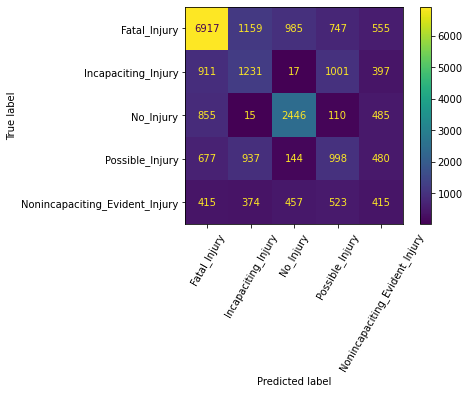


RandomForest
Accuracy(test) =  0.5483635112468281
Precision =  0.553762543956718
Recall =  0.5483635112468281
f1 =  0.5501082724935835
[[7175 1139  974  684  391]
 [ 824 1370   11 1000  352]
 [ 678   13 2756   74  390]
 [ 588  981  143 1064  460]
 [ 373  378  501  547  385]]


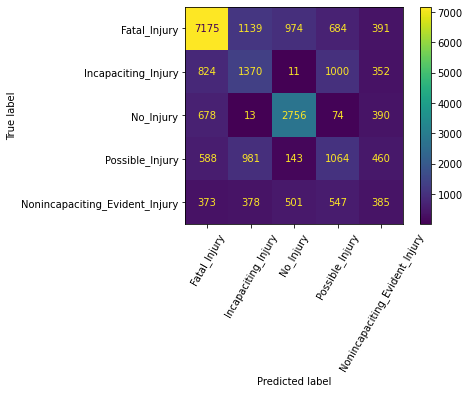


Support Vector Classifier
Accuracy(test) =  0.5236764010150101
Precision =  0.6066889207948833
Recall =  0.5236764010150101
f1 =  0.5099386780870917
[[4846 1722 2267 1495   33]
 [ 213 1438   25 1854   27]
 [ 210    0 3621   17   63]
 [ 174  646  191 2206   19]
 [ 142  226  695 1056   65]]


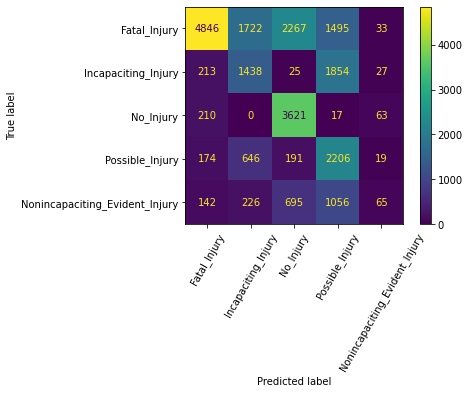


K-Nearest Neighbour
Accuracy(test) =  0.4618726076297794
Precision =  0.4941644973165488
Recall =  0.4618726076297794
f1 =  0.472184505110111
[[5755 1649 1444  921  594]
 [ 783 1323  140  930  381]
 [ 649  206 2399  225  432]
 [ 606 1012  272  892  454]
 [ 365  460  518  471  370]]


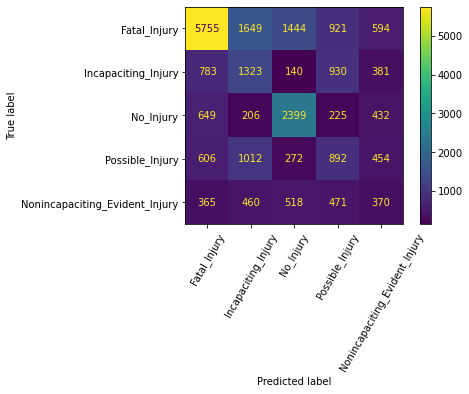

In [18]:
Pipeline1(X1_train,y1_train,X_test,y_test)

####Run 3 we use scaling and pca to reduce dimensionality


Logistic Regression
Accuracy(test) =  0.34222183992086364
Precision =  0.48028721617646464
Recall =  0.34222183992086364
f1 =  0.24664848906350828
[[ 659 2743 5162 1788   11]
 [   5 2634   23  892    3]
 [ 184   10 3710    7    0]
 [  18 2060  203  952    3]
 [  33  897  770  482    2]]



Decision Tree
Accuracy(test) =  0.48501139735925336
Precision =  0.5013503394380389
Recall =  0.48501139735925336
f1 =  0.49222712769375554
[[6459 1235 1128  866  675]
 [ 893 1211   16 1015  422]
 [ 924   16 2344  101  526]
 [ 660 1045  121  915  495]
 [ 449  414  471  502  348]]



RandomForest
Accuracy(test) =  0.5289234871618425
Precision =  0.5386704590338299
Recall =  0.5289234871618425
f1 =  0.5309055301790676
[[6750 1274 1216  736  387]
 [ 769 1368   14 1074  332]
 [ 690   16 2838   49  318]
 [ 545 1075  140 1050  426]
 [ 355  408  550  579  292]]


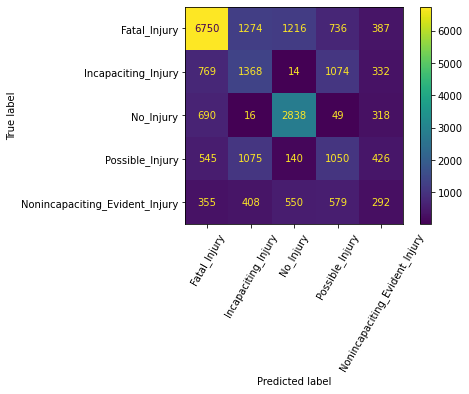


Support Vector Classifier
Accuracy(test) =  0.4592060556535203
Precision =  0.540965284588831
Recall =  0.4592060556535203
f1 =  0.4371420519514588
[[3611 2869 2412 1471    0]
 [  74 2333   22 1128    0]
 [ 417    9 3477    8    0]
 [ 113 1690  177 1256    0]
 [ 147  697  689  651    0]]


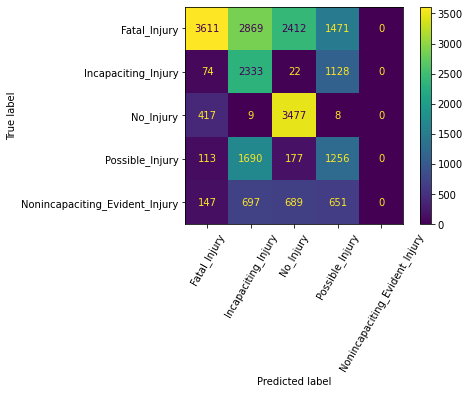


K-Nearest Neighbour
Accuracy(test) =  0.5314180035267301
Precision =  0.5417680992325358
Recall =  0.5314180035267301
f1 =  0.5330466256967902
[[6683 1313 1230  755  382]
 [ 784 1435   12 1010  316]
 [ 673   12 2883   35  308]
 [ 531 1130  140 1047  388]
 [ 346  482  557  491  308]]


In [70]:
Pipeline2(X1_train,y1_train,X_test,y_test,3)

####Hyperparameter Tuning Logistic regression

In [98]:
# Define the hyperparameter grid
classifier = LogisticRegression()

params = dict(
						C= [0.1, 1, 10], 
          	penalty=  ['l2', 'none'],
						solver=['newton-cg','saga','sag','lbfgs'])



random = RandomizedSearchCV(classifier,param_distributions=params,
                            cv=5,scoring="f1",verbose=1,n_jobs=-1,random_state=10)
	
random.fit(X_train,y_train)
 
estimator = random.best_estimator_
print("C: {0}".format(estimator.C))
print("Penalty: {0}".format(estimator.penalty))
print("Solver: {0}".format(estimator.solver))




Fitting 5 folds for each of 10 candidates, totalling 50 fits
C: 0.1
Penalty: none
Solver: saga


fit the hyperparameters into the model/can experiment with random hyperparameters for logistic regression

In [102]:
def fitLR(C,penalty,solver):
  lr1 = LogisticRegression(C=C,
                            penalty=penalty,
                            solver=solver,
                            random_state=10,
                             )
  evaluate(lr1,X_train,y_train,X_test,y_test)

Accuracy(test) =  0.5659111436067266
Precision =  0.522915975271426
Recall =  0.5659111436067266
f1 =  0.5203866993468217
[[8113  440 1207  598    5]
 [1704  679   16 1158    0]
 [ 932    1 2968   10    0]
 [1277  415  148 1396    0]
 [ 763  181  522  716    2]]


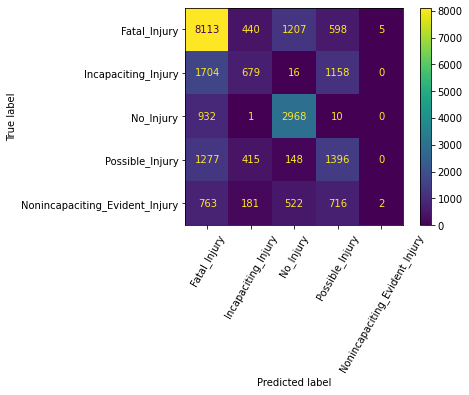

In [161]:
fitLR(0.1,'none','saga')
#fitLR(10,'l2','saga') #0.55
#fitLR(0.1,'l2','saga') #0.55
#fitLR(1,'l2','newton-cg') #0.54

####Hyper parameter tuning Decision tree

In [139]:
classifier = DecisionTreeClassifier()


params = dict(
    max_depth= [2,3,10,50],
    min_samples_split= [2,3,4],
    min_samples_leaf=[1,2,4]
)

# Create the RandomizedSearchCV object and specify the model, the range of hyperparameters, and the scoring method

random = RandomizedSearchCV(classifier, param_distributions= params,
                            scoring='f1', cv=5,verbose =1,n_jobs=-1,random_state=10)
random.fit(X_train, y_train)

# Printing the values of the parameters chosen by RandomizedsearchCV

estimator = random.best_estimator_

# Print the best hyperparameters and the best score
print("max_depth: {0}".format(estimator.max_depth))
print("min_samples_split: {0}".format(estimator.min_samples_split))
print("min_samples_leaf: {0}".format(estimator.min_samples_leaf))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
max_depth: 10
min_samples_split: 2
min_samples_leaf: 4


fit the hyperparameters into the model/can experiment with random hyperparameters for decision tree

In [91]:
def fitDT(max_depth,min_samples_split,min_samples_leaf):
  dt = DecisionTreeClassifier(max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=10,
                             )
  evaluate(dt,X_train,y_train,X_test,y_test)
  dt_imp=dt.feature_importances_
  indices = np.argsort(dt_imp)
  print(sorted(dt_imp,reverse=True))
  print(indices)

Accuracy(test) =  0.6111135004946023
Precision =  0.590562367953408
Recall =  0.6111135004946023
f1 =  0.5805433131096638
[[8262  517  840  722   22]
 [1104  953   14 1446   40]
 [ 771    1 3094   14   31]
 [ 714  508  148 1828   38]
 [ 432  167  567  946   72]]


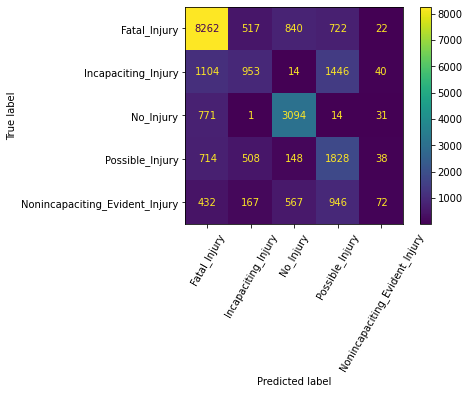

[0.29655999815906803, 0.23704371870946372, 0.12360553113254188, 0.07678911237314266, 0.06610512134348696, 0.06456274032432409, 0.04508320438256117, 0.03675382641112449, 0.024369406872477174, 0.0242347764670039, 0.003563956899735706, 0.0007982839524781039, 0.0005303229725920145, 0.0]
[13 11 10  9  8  3  0  2  6  1  5  7  4 12]


In [162]:
fitDT(10,2,4)
#fitDT(10,4,4)
#fitDT(10,3,2) #0.58
#fitDT(10,3,4) #0.58054


In [ ]:
X1_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 155441 entries, 133958 to 113084
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   CASE_STATE                           155441 non-null  int64
 1   AGE                                  155441 non-null  int64
 2   PERSON_TYPE                          155441 non-null  int64
 3   SEATING_POSITION                     155441 non-null  int64
 4   RESTRAINT_SYSTEM-USE                 155441 non-null  int64
 5   AIR_BAG_AVAILABILITY/DEPLOYMENT      155441 non-null  int64
 6   EJECTION                             155441 non-null  int64
 7   EXTRICATION                          155441 non-null  int64
 8   POLICE_REPORTED_ALCOHOL_INVOLVEMENT  155441 non-null  int64
 9   POLICE-REPORTED_DRUG_INVOLVEMENT     155441 non-null  int64
 10  SEX_Female                           155441 non-null  uint8
 11  SEX_Male                          

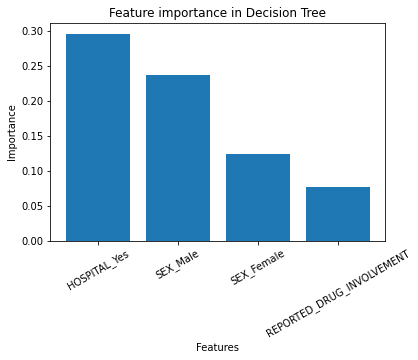

In [33]:
plt.bar(['HOSPITAL_Yes','SEX_Male','SEX_Female','REPORTED_DRUG_INVOLVEMENT'],[0.29655999815906803,  0.23704371870946372, 0.12360553113254188, 0.07678911237314266])
plt.xlabel('Features')
plt.xticks(rotation=30)
plt.ylabel('Importance')
plt.title('Feature importance in Decision Tree')
plt.rcParams.update({'font.size':10})

####Hyper parameter tuning random forest

In [168]:
classifier = RandomForestClassifier()

params = dict(
    max_depth=[None,5,10,20],
    n_estimators=[50, 100, 200,500],
    criterion=["gini","entropy"],
    max_features=["sqrt","log2"]
)

random = RandomizedSearchCV(classifier,param_distributions=params,
                            cv=5,scoring="f1",verbose=1,n_jobs=-1,random_state=10)
random.fit(X_train,y_train)

# Printing the values of the parameters chosen by RandomizedsearchCV

estimator = random.best_estimator_

# Print the best hyperparameters and the best score
print("Max tree depth: {0}".format(estimator.max_depth))
print("Number of trees: {0}".format(estimator.n_estimators))
print("split criterion: {0}".format(estimator.criterion))
print("Max features: {0}".format(estimator.max_features))    

 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Max tree depth: 10
Number of trees: 50
split criterion: gini
Max features: log2


fit the hyperparameters into the model/can experiment with random hyperparameters

In [170]:
def fitRF(max_depth,n_estimators,criterion,max_features):
  rf1 = RandomForestClassifier(max_depth=max_depth,
                            n_estimators=n_estimators,
                            criterion=criterion,
                            max_features=max_features,
                            random_state=10,
                             )
  evaluate(rf1,X_train,y_train,X_test,y_test)
  rf1_imp=rf1.feature_importances_
  indices = np.argsort(rf1_imp)
  print(sorted(rf1_imp,reverse=True))
  print(indices)

Accuracy(test) =  0.6115435895230312
Precision =  0.6042248023495336
Recall =  0.6115435895230312
f1 =  0.5786438524667357
[[8225  701  945  489    3]
 [1176 1253   16 1112    0]
 [ 672    3 3213   13   10]
 [ 804  776  146 1509    1]
 [ 452  253  624  836   19]]


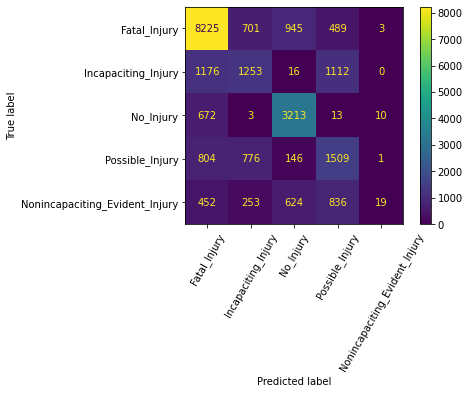

[0.17963306720882416, 0.1745331958174148, 0.15160233740868867, 0.09376163427510008, 0.09313556115621009, 0.06311317846366034, 0.060087790818863195, 0.053415448354292676, 0.04671185623881773, 0.040164387431975986, 0.025772502489211185, 0.011619330009977388, 0.003245033418039145, 0.003204676908924668]
[10 11  9  0  3  8  2  5  1  7  6  4 12 13]


In [171]:
fitRF(10,50,'gini','log2') 
#fitRF(None,500,'gini','sqrt') 
#fitRF(None,500,'entropy','sqrt') #0.56
#fitRF(None,500,'entropy','log2') #0.53

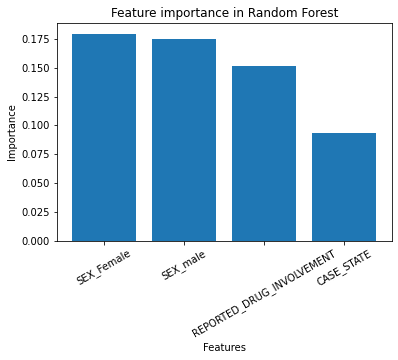

In [169]:
plt.bar(['SEX_Female','SEX_male','REPORTED_DRUG_INVOLVEMENT','CASE_STATE'],[0.17963306720882416, 0.1745331958174148,0.15160233740868867,0.09376163427510008])
plt.xlabel('Features')
plt.xticks(rotation=30)
plt.ylabel('Importance')
plt.title('Feature importance in Random Forest')
plt.rcParams.update({'font.size':10})

In [152]:
classifier = KNeighborsClassifier()
params = dict(
    n_neighbors=[2,4,10,20],
    p=[1,2],
    weights = ["uniform","distance"]
)


	
random = RandomizedSearchCV(classifier,param_distributions=params,cv=5,scoring="f1",verbose=0,n_jobs=-1,random_state=10)

random.fit(X1_train_scl,y1_train)

# Printing the values of the parameters chosen by RandomizedsearchCV
estimator = random.best_estimator_
# Print the best hyperparameters and the best score
print("Number of neighbours: {0}".format(estimator.n_neighbors))
print("p: {0}".format(estimator.p))
print("weights: {0}".format(estimator.weights))


Number of neighbours: 4
p: 1
weights: distance


In [115]:
def fitKNN(n_neighbors,p,weights):
  KNN = KNeighborsClassifier(n_neighbors=n_neighbors,
                            p=p,
                            weights=weights,
                             )
  evaluate(KNN,X1_train_scl,y1_train,X1_test_scl,y_test)

Accuracy(test) =  0.5420412025289235
Precision =  0.552782488489611
Recall =  0.5420412025289235
f1 =  0.5458055721908397
[[6972 1175 1023  757  436]
 [ 802 1383   14 1019  339]
 [ 650   10 2784   55  412]
 [ 549 1030  135 1059  463]
 [ 352  388  511  528  405]]


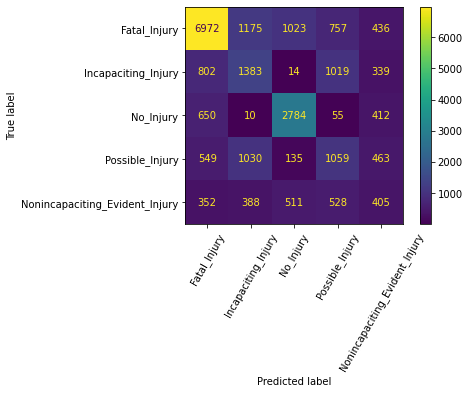

In [167]:
#fitKNN(3,2,'distance')
#fitKNN(3,2,'uniform')  0.5335
fitKNN(4,1,'distance') 
#fitKNN(5,1,'uniform')